In [385]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tabulate import tabulate
from scipy.linalg import svd

In [386]:
def show(image):
    """Show an image"""
    img = plt.imshow(image, cmap='gray', vmin=0, vmax=1)
    plt.axis("off")
    plt.show()


def to_gray(image):
    """Convert a four channel image to gray"""
    return cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)


def printf(matrix, decimals=1):
    """Print a formatted matrix"""
    print(tabulate(np.around(matrix, decimals=decimals)))


def print_svd(svd_result):
    U, s, VT = svd_result
    print("=== U ===")
    printf(U)
    print("=== sigma ===")
    printf(np.diag(s))
    print("=== V transpose ===")
    printf(VT)


def product_svd(svd_result):
    U, s, VT = svd_result
    return np.dot(U, np.dot(np.diag(s), VT))

(32, 32)


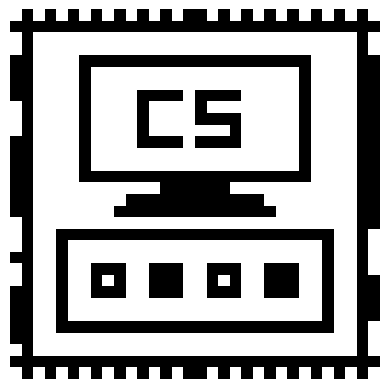

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1
1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1
0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0
0  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0
0  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0
0  0  1  1  1  1  0  1  1  1  1  0  0  0  0  1  0  0  0  0  1  1  1  1  1  0  1  1  1  1  0  0
1  0  1  1  1  1  0  1  1  1  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0
1  0  1  1  1  1  0  1  1  1  1  0  1  1  1  1  0 

In [387]:
watermark = to_gray(imread('images/watermark.png'))
print(watermark.shape)
show(watermark)
printf(watermark)

(512, 512)


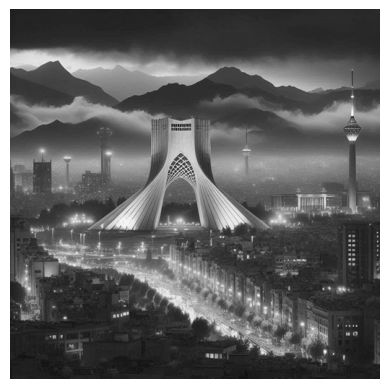

In [388]:
image = to_gray(imread('images/tehran.png'))
image = cv2.resize(image, (512, 512))
print(image.shape)
show(image)

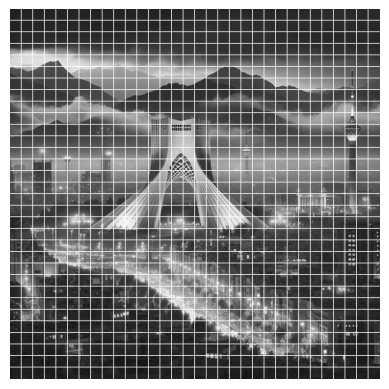

In [389]:
grid = np.copy(image)
grid[:,15:-1:16] = 1
grid[15:-1:16, :] = 1
show(grid)

In [390]:
def extract_features(image):
    extracted_features = np.zeros((image.shape[0]//16,image.shape[0]//16))

    for i in range(image.shape[0]//16):
        for j in range(image.shape[0]//16):
            block = image[16*i:16*(i+1),16*j:16*(j+1)]
            u, s, vt = svd(block)
            feature = sum(s > 0.0001)
            extracted_features[i,j] = feature

    return extracted_features
    

In [391]:
def extract_watermark(image):
    extracted_watermark = np.zeros((image.shape[0]//16, image.shape[0]//16))
    extracted_features = extract_features(image)

    for i in range(image.shape[0]//16):
        for j in range(image.shape[0]//16):
            extracted_watermark[i, j] = extracted_features[i, j] % 2

    return extracted_watermark

==== extracted features ====
--  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --
10   5   6   3   6   4   4   7   7   6  12   9   7  12  10   6   7   8   7   7  11   5   5   5   4   4  11  12  11   7   7  10
 9   4   6   7   4   4   5   4   8  10   7   8   9   9  11  12   9  11   8  11   6  10   9   8   4   4   4   3   2   3   3   8
13  10   6   5   5   6   9   5   6   5  14   7   7   7  13   7   5   6   2   1   1   4   7   5   6   6   7   4   8   5   6   4
15  16  15  15  15  16  16  15  16  16  16  16  15  14  13  12  12  12   7   8   8   8   5  13  12  10  12  13   8  11  10  11
16  16  15  15  16  16  16  15  16  16  16  16  16  16  16  15  16  15  16  16  16  16  16  16  15  15  16  16  16  16  16  16
16  16  15  14  14  16  16  16  15  15  15  16  16  16  16  16  15  15  15  15  15  15  16  16  16  16  16  16  15  16  15  16
13  13  15  13  12  15  13  15  12  13  12  15  16  16  16  16  13  15  16  15  15

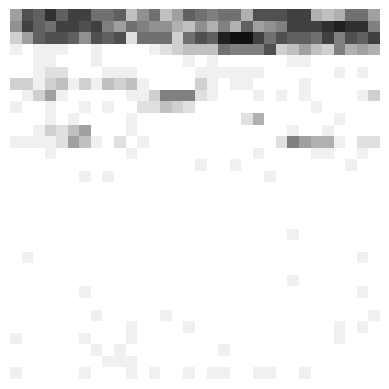

==== extracted watermark ====


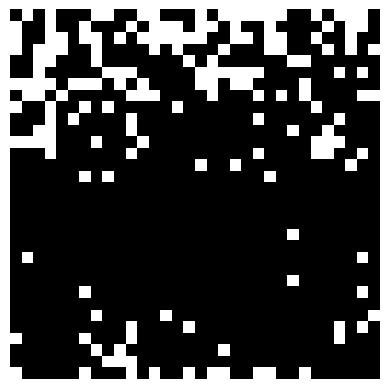

In [392]:
extracted_features = extract_features(image)
print("==== extracted features ====")
printf(extracted_features)
show(extracted_features/16)
print("==== extracted watermark ====")
show(extract_watermark(image))

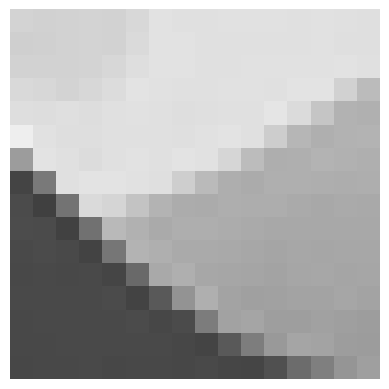

--
16
--


In [393]:
i, j = 5, 5
block = image[16*i:16*(i+1), 16*j:16*(j+1)]
show(block)
printf(extract_features(block))

In [394]:
def low_rank_approx(svd_result, rank):
    U, s, VT = svd_result

    U_low = np.copy(U)
    U_low = U_low[:, :rank]

    s_low = np.copy(s)
    s_low = s_low[:rank]

    VT_low = np.copy(VT)
    VT_low = VT_low[:rank]

    return U_low, s_low, VT_low

def compress(image, rank):
    U, s, VT = svd(image)
    U_low, s_low, VT_low = low_rank_approx((U, s, VT), rank)
    return product_svd((U_low, s_low, VT_low))

==== initial block ====


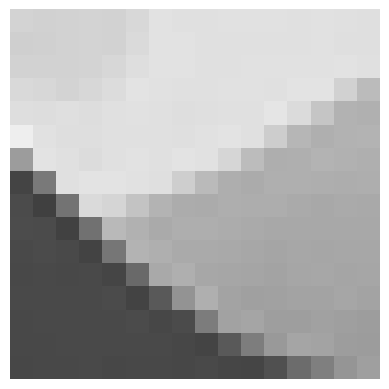

@ extracted feature of initial block: 
--
16
--
==== new block ====


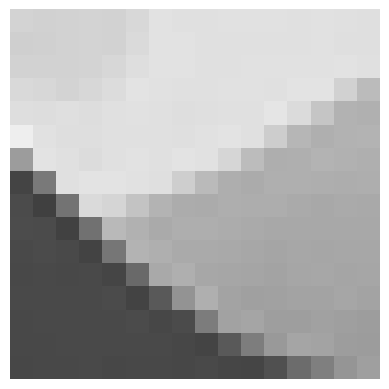

@ extracted feature of new block: 
--
15
--


In [395]:
new_block = compress(block, 15)
print("==== initial block ====")
show(block)
print("@ extracted feature of initial block: ")
printf(extract_features(block))
print("==== new block ====")
show(new_block)
print("@ extracted feature of new block: ")
printf(extract_features(new_block))

In [396]:
from math import log10, sqrt 
def calc_psnr(original, compressed): 
    '''peak signal-to-noise ratio'''
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [397]:
calc_psnr(block, new_block)

138.30920305134856

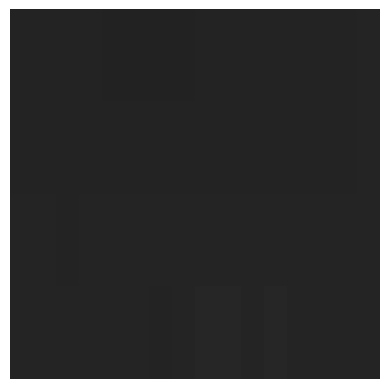

-
4
-


In [398]:
i, j = 1, 1
block = image[16*i:16*(i+1), 16*j:16*(j+1)]
show(block)
printf(extract_features(block))

==== initial block ====


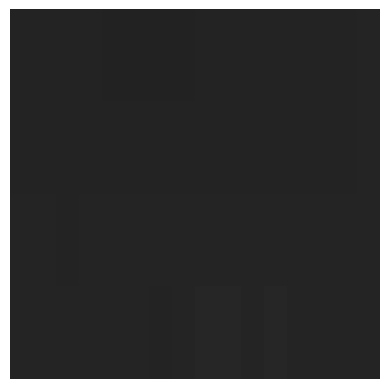

@ extracted feature of initial block: 
-
4
-
==== new block ====


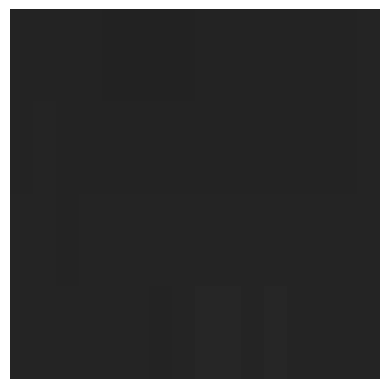

@ extracted feature of new block: 
-
3
-


In [399]:
new_block = compress(block, 3)
print("==== initial block ====")
show(block)
print("@ extracted feature of initial block: ")
printf(extract_features(block))
print("==== new block ====")
show(new_block)
print("@ extracted feature of new block: ")
printf(extract_features(new_block))

In [400]:
calc_psnr(block, new_block)

115.2946612407045

In [401]:
def embed_watermark(image, watermark):
    watermarked_image = np.copy(image)

    for i in range(image.shape[0] // 16):
        for j in range(image.shape[0] // 16):
            block = watermarked_image[16 * i : 16 * (i + 1), 16 * j : 16 * (j + 1)]
            feature = int(np.sum(extract_features(block)))
            if feature > 1 and (
                (feature % 2 == 0 and watermark[i, j] == 1)
                or (feature % 2 == 1 and watermark[i, j] == 0)
            ):
                new_block = compress(block, feature - 1)
                watermarked_image[16 * i : 16 * (i + 1), 16 * j : 16 * (j + 1)] = new_block

    return watermarked_image

==== original image ====


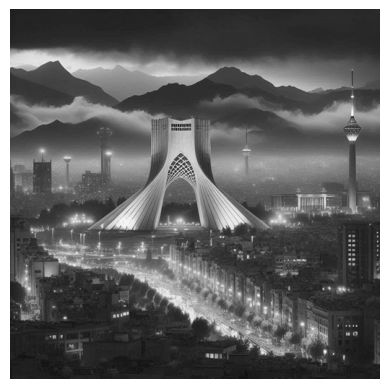

==== watermarked image ====


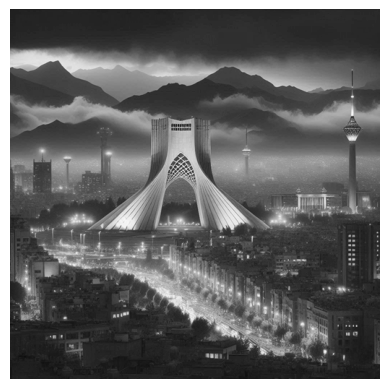

==== original watermark ====


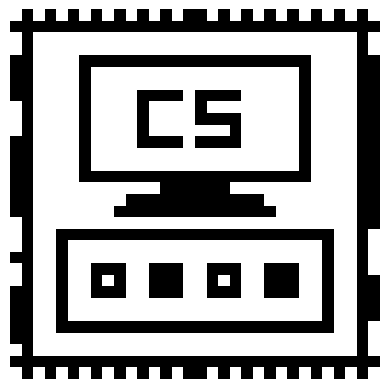

==== extracted watermark ====


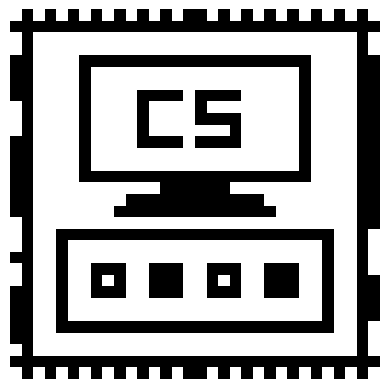

In [402]:
watermarked_image = embed_watermark(image, watermark)
extracted_watermark = extract_watermark(watermarked_image)
print("==== original image ====")
show(image)
print("==== watermarked image ====")
show(watermarked_image)
print("==== original watermark ====")
show(watermark)
print("==== extracted watermark ====")
show(extracted_watermark)

In [403]:
calc_psnr(image, watermarked_image)

123.15384461063968

In [404]:
np.sum(np.abs(watermark - extracted_watermark))

0.0

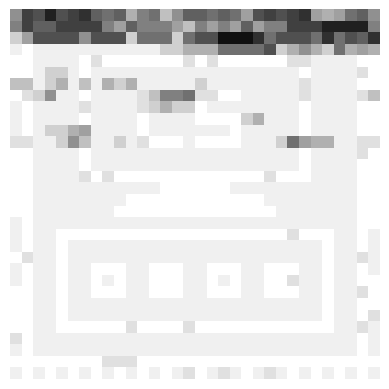

In [405]:
show(extract_features(watermarked_image)/ 16)

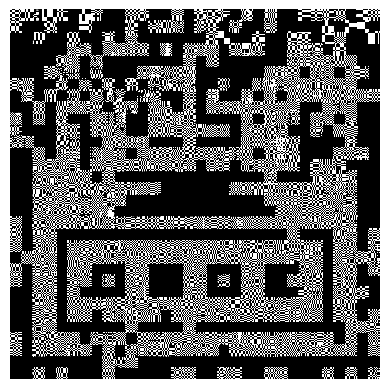

In [406]:
show((image - watermarked_image)*100000000)

# Using Smaller Blocks + PRNG

In [407]:
import random
print(random.random())
print(random.random())
print(random.random())

0.71435834230606
0.5319592802405712
0.8957577708257675


In [408]:
random.seed("this is a password 1234!")
print(random.random())
random.seed("this is a password 1234!")
print(random.random())
random.seed("this is a password 1234!")
print(random.random())

0.14455917926259487
0.14455917926259487
0.14455917926259487


In [409]:
random.seed("ANOTHER PASSWORD @#$%^ !")
print(random.random())
random.seed("ANOTHER PASSWORD @#$%^ !")
print(random.random())
random.seed("ANOTHER PASSWORD @#$%^ !")
print(random.random())

0.8243075556541342
0.8243075556541342
0.8243075556541342


In [410]:
BLOCKS = [(i,j) for i in range(0, 512, 8) for j in range(0, 512, 8)]
print(BLOCKS)
len(BLOCKS)

[(0, 0), (0, 8), (0, 16), (0, 24), (0, 32), (0, 40), (0, 48), (0, 56), (0, 64), (0, 72), (0, 80), (0, 88), (0, 96), (0, 104), (0, 112), (0, 120), (0, 128), (0, 136), (0, 144), (0, 152), (0, 160), (0, 168), (0, 176), (0, 184), (0, 192), (0, 200), (0, 208), (0, 216), (0, 224), (0, 232), (0, 240), (0, 248), (0, 256), (0, 264), (0, 272), (0, 280), (0, 288), (0, 296), (0, 304), (0, 312), (0, 320), (0, 328), (0, 336), (0, 344), (0, 352), (0, 360), (0, 368), (0, 376), (0, 384), (0, 392), (0, 400), (0, 408), (0, 416), (0, 424), (0, 432), (0, 440), (0, 448), (0, 456), (0, 464), (0, 472), (0, 480), (0, 488), (0, 496), (0, 504), (8, 0), (8, 8), (8, 16), (8, 24), (8, 32), (8, 40), (8, 48), (8, 56), (8, 64), (8, 72), (8, 80), (8, 88), (8, 96), (8, 104), (8, 112), (8, 120), (8, 128), (8, 136), (8, 144), (8, 152), (8, 160), (8, 168), (8, 176), (8, 184), (8, 192), (8, 200), (8, 208), (8, 216), (8, 224), (8, 232), (8, 240), (8, 248), (8, 256), (8, 264), (8, 272), (8, 280), (8, 288), (8, 296), (8, 304),

4096

In [411]:
PASSWORD = "Scientific Computing 1402-1403"
random.seed(PASSWORD)
blocks = random.choices(BLOCKS, k=32*32)
print(blocks)

[(464, 200), (304, 424), (128, 168), (304, 48), (504, 8), (136, 296), (200, 440), (352, 200), (152, 296), (336, 240), (80, 392), (440, 208), (104, 40), (288, 304), (40, 88), (352, 152), (416, 352), (472, 240), (104, 296), (56, 280), (16, 304), (216, 176), (48, 16), (400, 16), (8, 392), (208, 64), (504, 488), (352, 104), (416, 120), (352, 192), (136, 296), (120, 16), (136, 504), (40, 72), (384, 392), (112, 272), (112, 120), (272, 248), (16, 64), (472, 48), (304, 40), (464, 152), (384, 336), (136, 184), (376, 488), (24, 480), (256, 392), (504, 248), (120, 96), (320, 272), (80, 408), (152, 400), (160, 208), (472, 424), (24, 392), (48, 160), (272, 352), (328, 296), (208, 64), (376, 392), (200, 96), (120, 384), (496, 472), (312, 16), (360, 296), (344, 264), (64, 184), (400, 264), (32, 32), (8, 336), (64, 360), (288, 112), (160, 384), (96, 176), (344, 264), (488, 368), (408, 96), (160, 80), (488, 264), (208, 456), (296, 200), (104, 368), (448, 0), (176, 400), (32, 32), (320, 488), (504, 336)

In [412]:
def embed_watermark2(image, watermark, password):    
    random.seed(password)
    blocks = random.choices(BLOCKS, k=32 * 32)

    watermarked_image = np.copy(image)

    for i in range(32):
        for j in range(32):
            x, y = blocks[32 * i + j]
            block = watermarked_image[x : x + 8, y : y + 8]
            feature = int(np.sum(svd(block)[1] > 0.0001))
            if feature > 1 and (
                (feature % 2 == 0 and watermark[i, j] == 1)
                or (feature % 2 == 1 and watermark[i, j] == 0)
            ):
                new_block = compress(block, feature - 1)
                watermarked_image[x : x + 8, y : y + 8] = new_block

    return watermarked_image

==== original image ====


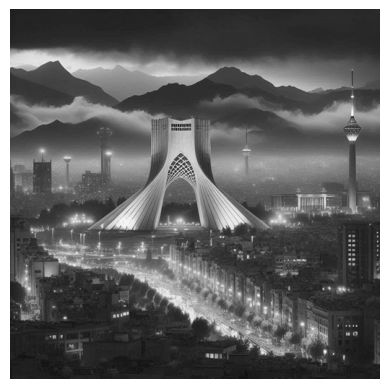

==== watermarked image ====


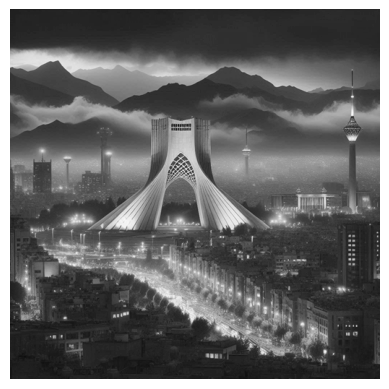

PSNR: 115.92755147870223


In [413]:
watermarked_image = embed_watermark2(image, watermark, PASSWORD)
print("==== original image ====")
show(image)
print("==== watermarked image ====")
show(watermarked_image)
print("PSNR:", calc_psnr(image, watermarked_image))

In [414]:
def extract_watermark2(watermarked_image, password):
    random.seed(password)
    blocks = random.choices(BLOCKS, k=32 * 32)

    extracted_watermark = np.zeros((32, 32))

    for i in range(32):
        for j in range(32):
            x, y = blocks[32 * i + j]
            block = watermarked_image[x : x + 8, y : y + 8]
            feature = int(np.sum(svd(block)[1] > 0.0001))
            extracted_watermark[i, j] = feature % 2

    return extracted_watermark

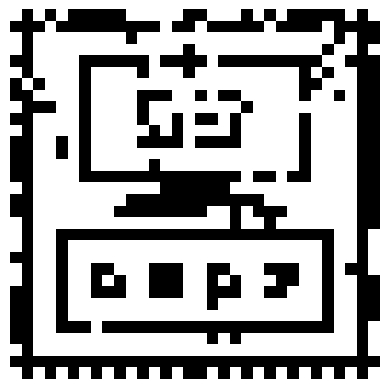

In [415]:
extracted_watermark = extract_watermark2(watermarked_image, PASSWORD)
show(extracted_watermark)

In [416]:
np.sum(np.abs(watermark - extracted_watermark))

63.0

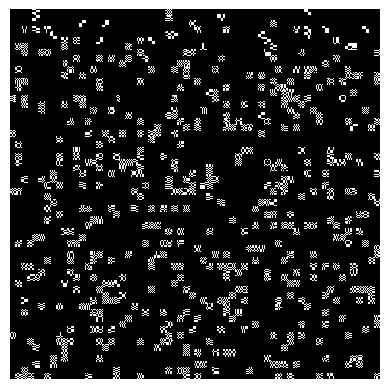

In [417]:
show((image - watermarked_image)*100000000)

## Resources
* https://www.researchgate.net/publication/339224683_Digital_Image_Watermarking_using_Singular_Value_Decomposition
* https://www.ijcaonline.org/ecot/number1/SPE134T.pdf
* https://link.springer.com/article/10.1007/s12046-012-0089-x